In [1]:
%load_ext autoreload
%autoreload 2

import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody


environments = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
                NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.190, line_velocity= 0.190, t_d=3.41)]

[<NLTE.NLTE_model.CollisionProcess object at 0x7ff5e8081790>, <NLTE.NLTE_model.RadiativeProcess object at 0x7ff5d003d040>, <NLTE.NLTE_model.RecombinationProcess object at 0x7ff5e80b56a0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7ff5e80b5640>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7ff620319370>, <NLTE.NLTE_model.RadiativeProcess object at 0x7ff6203a1250>, <NLTE.NLTE_model.RecombinationProcess object at 0x7ff5e06ffd90>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7ff6203a1670>]


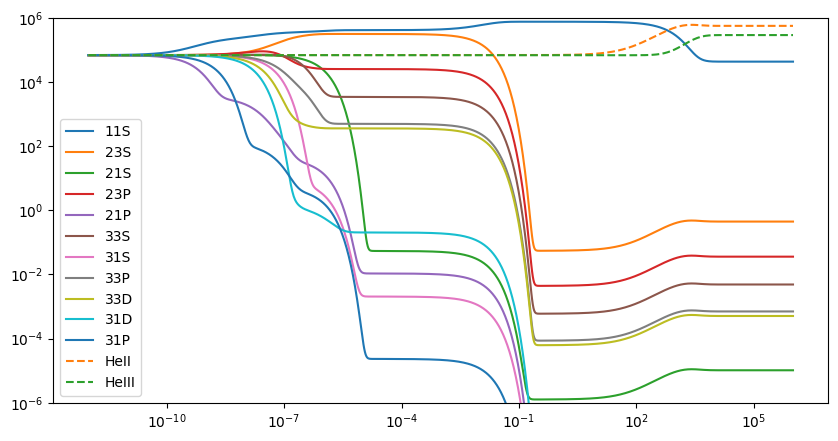

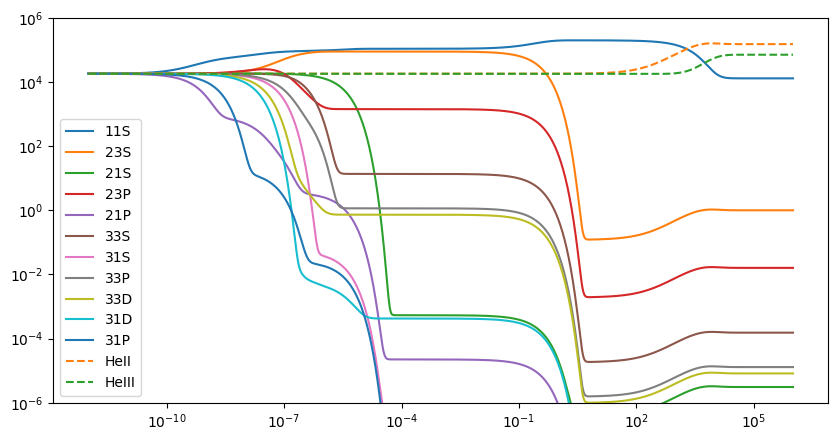

In [2]:
states = NLTE.NLTE_model.States()
for environment in environments:
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    print(nlte_solver.processes)
    t, y = nlte_solver.solve(np.geomspace(1e-12,1000000, 1000))
    plt.figure(figsize=(10,5))
    plt.plot(t, y.T[:, :-2], label = states.names);
    plt.plot(t, y.T[:, -2:], linestyle="--", label  = ["HeII", "HeIII"]);
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1e-6, 1e6)
    plt.legend()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

In [57]:
nlte_solver.processes

In [59]:
nlte_solver.processes[:2] + nlte_solver.processes[3:]


In [330]:
T_arr = np.linspace(2300, 7000, 20 )
varr = 0.31*np.ones_like(T_arr)
tarr = 1.2*np.ones_like(T_arr)
parameters = [{"T_phot": T, "photosphere_velocity": v, "t_d": t} for T,v,t in zip(T_arr, varr, tarr)
             ]# TODO: rest
density_table = []

i_arr = [1, 1, 1, 1, 1, 1]

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)
c_arr = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

mass0 = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 25)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    
    dens0.append( densities[0,1] ) 
    
    tau_at_layer = densities[:,1]/(7.4*params["t_d"]**-1)
    nHe = np.trapz( (4 * np.pi * (velocities*3e10*params["t_d"]*24*3600 )**2 * np.sum(densities[:,:], axis=1) ), 
         velocities*3e10*params["t_d"]*24*3600 
         )
    
    mass0.append( nHe*(6.646e-27)/2e30 * 4.04/tau_at_layer[0] )

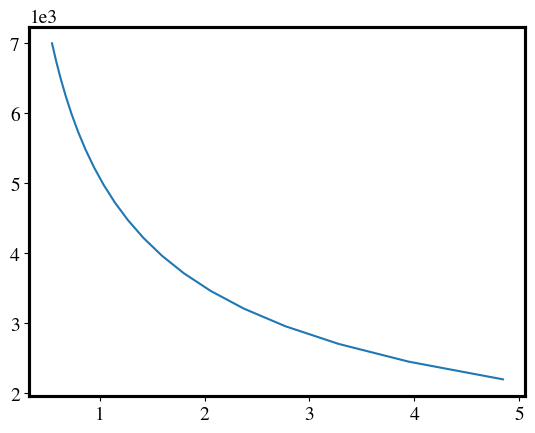

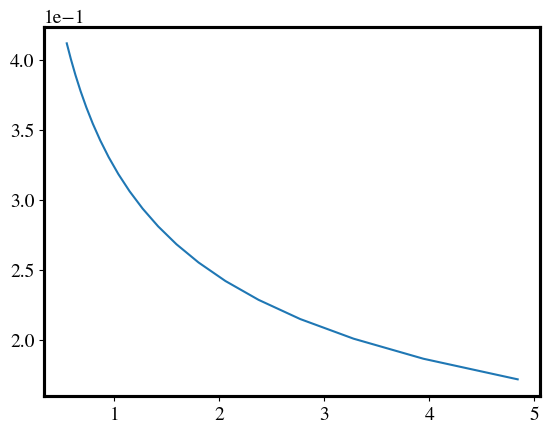

In [332]:
T_arr = np.linspace(2200, 7000, 20 )
tarr = np.zeros_like(T_arr)
#tarr[T_arr>4200] = 1.43*(T_arr[T_arr>4200]/4200)**(-1/0.6)
#tarr[T_arr<4200] = 1.43*(T_arr[T_arr<4200]/4200)**(-1/0.4)
tarr = 1.43*(T_arr/4200)**(-1/0.53)

plt.plot(tarr, T_arr)

plt.figure()
#varr = 0.30 - 0.03*(tarr-1.17)  #0.25* np.ones_like(T_arr) 
varr = 0.28* (tarr/1.43)**(-0.4)

plt.plot(tarr, varr)

In [333]:
#T_arr = np.linspace(2500, 6000, 20 )
#tarr = 1.17*(T_arr/5000)**(-1/0.53)
#varr = 0.3*np.ones_like(T_arr)
#varr = 0.32 - 0.03*(tarr-1.17) 

parameters = [{"T_phot": T, "photosphere_velocity": v, "t_d": t} for T,v,t in zip(T_arr, varr, tarr)
             ]# TODO: rest
density_table = []

i_arr = [1, 1, 1, 1, 1, 1]

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)
c_arr = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

mass0_no_photoionisation = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 25)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    
    dens0.append( densities[0,1] ) 
    
    tau_at_layer = densities[:,1]/(7.4*params["t_d"]**-1)
    nHe = np.trapz( (4 * np.pi * (velocities*3e10*params["t_d"]*24*3600 )**2 * np.sum(densities[:,:], axis=1) ), 
                   #* densities[:,-2]), #
         velocities*3e10*params["t_d"]*24*3600 
         )
    
    mass0_no_photoionisation.append( nHe*(6.646e-27)/2e30 * 4.04/tau_at_layer[0] )

In [334]:
#T_arr = np.linspace(2500, 6000, 20 )
#tarr = 1.17*(T_arr/5000)**(-1/0.53)
#varr = 0.3*np.ones_like(T_arr)
#varr = 0.32 - 0.03*(tarr-1.17) 

parameters = [{"T_phot": T, "photosphere_velocity": v, "t_d": t} for T,v,t in zip(T_arr, varr, tarr)
             ]# TODO: rest
density_table = []

i_arr = [1, 1, 1, 1, 1, 1]

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)
c_arr = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

mass_Tarumi = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 25)
    densities = []
    for v in velocities:
        states = NLTE.NLTE_model.States().filter(["11S", "23S", "21S", "23P", "21P"])
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states=states)
        nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    
    dens0.append( densities[0,1] ) 
    
    tau_at_layer = densities[:,1]/(7.4*params["t_d"]**-1)
    nHe = np.trapz( (4 * np.pi * (velocities*3e10*params["t_d"]*24*3600 )**2 * densities[:,-2]), #np.sum(densities[:,-2], axis=1) ), 
         velocities*3e10*params["t_d"]*24*3600 
         )
    
    mass_Tarumi.append( nHe*(6.646e-27)/2e30 * 4.04/tau_at_layer[0] )

In [315]:
densities

array([[2.52143935e+03, 1.19724384e-03, 2.74120229e-06, 1.68831332e-04,
        3.16814342e-09, 6.87597855e-05, 1.93749884e-09, 1.28680126e-05,
        9.81869443e-06, 5.68695218e-09, 1.11647840e-09, 3.52658797e+05,
        5.34639328e+05],
       [2.09006580e+03, 1.45209041e-03, 2.71978856e-06, 1.84158450e-04,
        2.62871145e-09, 6.57341562e-05, 1.39013815e-09, 1.16655192e-05,
        9.02360865e-06, 5.20555753e-09, 9.17239353e-10, 3.12442210e+05,
        5.10725983e+05],
       [1.72690579e+03, 1.42810029e-03, 2.44035918e-06, 1.72011358e-04,
        2.17290227e-09, 5.77453107e-05, 1.07298088e-09, 1.00151263e-05,
        7.78475362e-06, 4.48580504e-09, 7.54854473e-10, 2.76942769e+05,
        4.87567633e+05],
       [1.42788885e+03, 1.35760219e-03, 2.15597693e-06, 1.56682941e-04,
        1.79726726e-09, 5.00524256e-05, 8.39323385e-10, 8.53016744e-06,
        6.65056746e-06, 3.82973016e-09, 6.22212355e-10, 2.45597925e+05,
        4.65184066e+05],
       [1.18195769e+03, 1.26855143e-

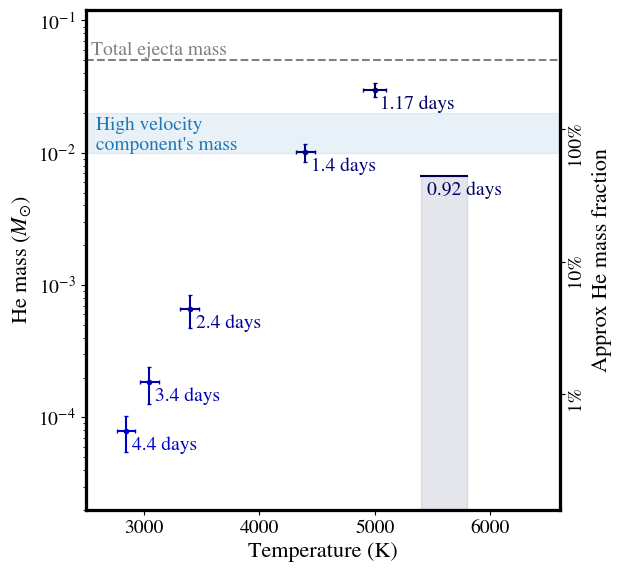

In [381]:
def reset_plt(ticksize,fontsize):
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = False
    plt.rcParams['grid.alpha'] = 0.6
reset_plt(14, 16)

def get_darker(alpha, color):
    return [ alpha*color[i] for i in range(3) ]

fig, ax = plt.subplots(figsize=(6.5,6))

mass0 = mass0_no_photoionisation
#plt.plot(T_arr, mass0, color=get_darker(0.6, [0.3, 0, 1]), label=' He II mass required \n to produce feature')
#plt.plot(T_arr, mass_Tarumi)

plt.yscale('log')
plt.ticklabel_format(axis='x', useOffset=False, style='plain')
plt.xlim(2500, 6600)
plt.ylim(2e-5, 1.2e-1)
plt.ylabel('He mass $(M_{\odot})$')
plt.xlabel('Temperature (K)')

plt.axhline(0.05, ls='--', color='grey'),
plt.text(2550, 0.055, 'Total ejecta mass', fontsize=14, color='grey')
#plt.axhline(0.01, ls='dotted', color='C0'), 
plt.fill_between([1e3,1e4] ,[0.01, 0.01], [0.02, 0.02], color='C0', alpha=0.1)
plt.text(2550, 0.0105, " High velocity \n component's mass", color='C0', fontsize=14)
#plt.axhline(0.01*1e-2, ls='-', color='darkblue'), 


from scipy.interpolate import interp1d
i1 = interp1d(T_arr, mass0)(5000)
T_swift = 6400 / (1+np.random.normal(loc=0.30, scale=0.025, size=100) )
ratio_err = np.std(interp1d(T_arr, mass0)(T_swift))
plt.errorbar(5000, i1, xerr = 100, yerr = ratio_err, color=get_darker(0.4, [0, 0, 1]), capsize=1.5, fmt='.',
              )
#plt.text(5000-60, 2.5e-5, 'SALT + Swift', color=get_darker(0.4, [0, 0, 1]), fontsize=16, rotation=90)
#plt.fill_between([5000-100, 5000+100], [i1-ratio_err, i1+ratio_err], color=get_darker(0.4, [0, 0, 1]), alpha=0.1)
#plt.fill_between([0, 5000-100, 5000+100], [i1-ratio_err, i1-ratio_err, i1+ratio_err], [i1+ratio_err, i1+ratio_err, i1+ratio_err], 
#                 color=get_darker(0.4, [0, 0, 1]), alpha=0.1)
plt.text(5000+50, i1*0.72, str(1.17)+' days', fontsize=14, color=get_darker(0.4, [0, 0, 1]) )  


plt.plot([5600-200, 5600+200], [i1*0.225, i1*0.225], color=get_darker(0.3, [0, 0, 1]))
plt.fill_between([5600-200, 5600+200], [i1*0.225, i1*0.225], color=get_darker(0.3, [0, 0, 1]), alpha=0.1)
plt.text(5400+50, i1*0.225*0.72, str(0.92)+' days', fontsize=14, color=get_darker(0.4, [0, 0, 1]) )  


n_days = [1.4, 2.4, 3.4, 4.4]
i = [0.5, 0.6, 0.7, 0.8]
for T_x1, nday, i in zip([4400, 3400, 3050, 2850],n_days, i): 
    #T_x1 = 4400
    i1 = interp1d(T_arr, mass0)(T_x1)
    T_swift = np.random.normal(loc=T_x1, scale=80, size=100)
    ratio_err = np.std(interp1d(T_arr, mass0)(T_swift))
    plt.errorbar(T_x1, i1, xerr = 80, yerr = ratio_err, color=get_darker(i, [0, 0, 1]), capsize=1.5, fmt='.',
                  )
    
    #plt.fill_between([T_x1-80, T_x1+80], [i1-ratio_err, i1+ratio_err], color=get_darker(i, [0, 0, 1]), alpha=0.1)
    #plt.fill_between([0, T_x1-80, T_x1+80], [i1-ratio_err, i1-ratio_err, i1+ratio_err], [i1+ratio_err, i1+ratio_err, i1+ratio_err], 
    #             color=get_darker(i, [0, 0, 1]), alpha=0.1)

    plt.text(T_x1+50, i1*0.72, str(nday)+' days', fontsize=14, color=get_darker(i, [0, 0, 1]) )  


    

    
ax_new = ax.twinx()   
plt.ylim( ax.get_ylim() )
plt.yscale('log')
plt.yticks([0.015, 1.5e-3, 1.5e-4], labels=['  100%', '  10%', '  1%'], rotation=90)
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_minor_locator(plt.NullLocator())

#plt.set_ticks()
plt.ylabel('Approx He mass fraction')
#plt.legend(handlelength=1.3, loc=2)
plt.tight_layout()
#plt.savefig('He_mass_time_1.png', dpi=300) 


In [368]:
7500/(1+0.3), 6800/(1+0.3)

(5769.230769230769, 5230.7692307692305)

In [379]:
0.9*2.5

2.25

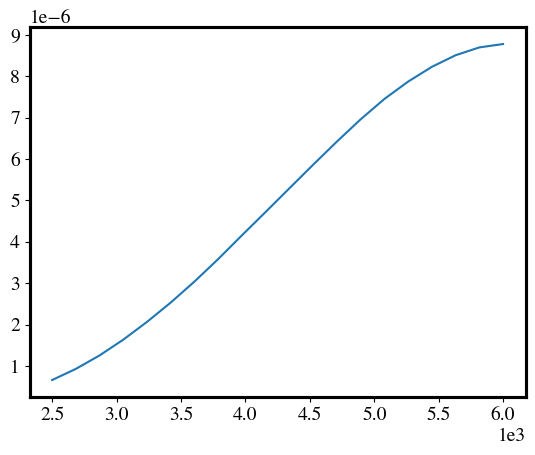

In [248]:
plt.plot(T_arr, mass_Tarumi)


In [76]:
3200 / (1+0.15)

2782.608695652174

In [97]:
T_swift

array([2822.59548265, 2583.0315357 , 2680.15655717, 2759.07694215,
       2776.86788175, 2863.81779879, 2753.83711694, 2790.07183226,
       2850.86764284, 2743.93727089, 2766.33474061, 2652.62044089,
       2704.01736145, 2711.11998781, 2750.63066928, 2749.60170995,
       2758.48183635, 2788.79082161, 2934.15027535, 2800.18771761,
       2494.94873073, 2818.25804247, 2813.92700594, 2868.7685903 ,
       2779.8978359 , 2736.8100323 , 2901.64035679, 3051.65008434,
       2823.75980133, 2826.30823371, 2878.20635826, 2850.43951853,
       2592.05632281, 2713.70021449, 2887.95742362, 2669.86421906,
       2723.14642687, 2822.31451957, 2861.71824702, 2886.4801292 ,
       2883.14538064, 2674.49407586, 2812.90784045, 2791.3274183 ,
       2886.0001875 , 2704.24224361, 2870.36549738, 2842.04868964,
       2768.18856691, 2980.49032488, 2860.50497555, 2881.25650291,
       2792.85414731, 2832.26518807, 2690.25955872, 2860.67640674,
       2869.00630859, 2671.16559533, 2818.55921381, 2918.73594

## To infer optical depth at different times versus fits

tau0 23.527320616421108 ve 0.06119380376013717
-8.422256656750802


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


tau0 1465.3022512411885 ve 0.005465082234673537
-8.014616015898097
tau0 211.23565102585624 ve 0.0579415761397329
-7.242600798240009
tau0 2698.1759142461055 ve 0.041096497343119494
-6.607481938315359
tau0 11366.598546729589 ve 0.03251473679258643
-6.288491149615786
tau0 18145.168727062497 ve 0.0286740821603429
-6.125283560948803


Text(0.5, 0, 'v')

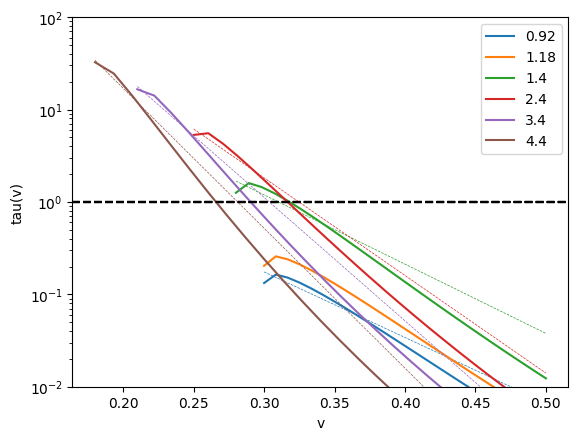

In [86]:
parameters = [{"T_phot": 5800, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 4900, "photosphere_velocity": 0.3, "t_d": 1.18},
              {"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              {"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              {"T_phot": 3000, "photosphere_velocity": 0.21, "t_d": 3.4},
              {"T_phot": 2900, "photosphere_velocity": 0.18, "t_d": 4.4},
              ]# TODO: rest
density_table = []

i_arr = [1, 1, 1, 1, 1, 1]

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)
c_arr = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

for i, color, params in zip(i_arr, c_arr, parameters):
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 25)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002), label = params["t_d"], 
            color = color);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    
    
    optic_thick = densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002) > 1
    #print( velocities[optic_thick] )
    
    #print( np.trapz(velocities, densities[:,1]/(7.4*params["t_d"]**-1) * (5.0/0.002)) )
    
    #plt.xscale("log")
    plt.ylim(1e-2, 1e2)
    plt.legend()
    
    tau_arr = densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002)
    p0,_ = curve_fit(fit_tau_v, velocities, tau_arr, p0 = [1000, 0.05])
    plt.plot( velocities, fit_tau_v(velocities, *p0), ls='--', linewidth=0.5, color=color)
    print('tau0', p0[0], 've', p0[1])

    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)
    
    nHe_3s = np.trapz( (4 * np.pi * (velocities*3e10*1.18*24*3600 )**2 * densities[:,1] * (5.0/0.002)), 
         velocities*3e10*1.18*24*3600 
         )
    
    nHe = np.trapz( (4 * np.pi * (velocities*3e10*1.18*24*3600 )**2 * np.sum(densities[:,:], axis=1) * (5.0/0.002)) , 
         velocities*3e10*1.18*24*3600 
         )
    
    #print()
    
    print( np.log10( nHe_3s/nHe ) )
plt.ylabel('tau(v)')
plt.xlabel('v')

In [378]:
10**0.4

2.51188643150958

0.951476582568819
5.0536257892241485
0.17091932742380173
0.03445074103118484
0.013268429232200722
0.004341960624418451


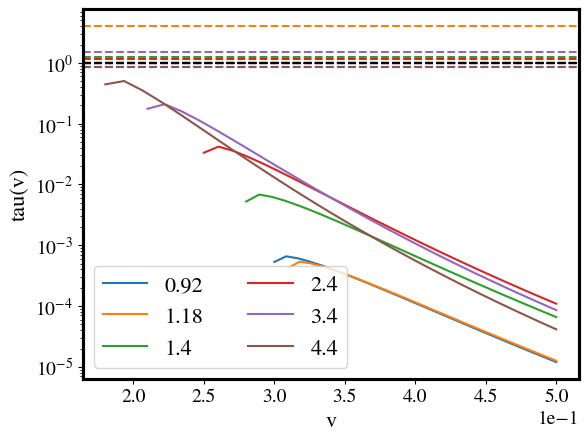

In [327]:
tau_list = [3*0.285, 4.04, 1.23, 1.15, 1.5, 0.86]
parameters = [{"T_phot": 5800, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 5000, "photosphere_velocity": 0.31, "t_d": 1.18},
              {"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              {"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              {"T_phot": 3000, "photosphere_velocity": 0.21, "t_d": 3.4},
              {"T_phot": 2900, "photosphere_velocity": 0.18, "t_d": 4.4},
              ]# TODO: rest
density_table = []

i_arr = [1, 1, 1, 1, 1, 1]

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)
c_arr = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

for i, color, tau_desired, params in zip(i_arr, c_arr, tau_list, parameters):
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 25)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1), label = params["t_d"], 
            color = color);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    
    plt.axhline(tau_desired, color=color, ls='--')#, label='Required')
    
    tau_at_layer = densities[:,1]/(7.4*params["t_d"]**-1)
    
    nHe = np.trapz( (4 * np.pi * (velocities*3e10*params["t_d"]*24*3600 )**2 * np.sum(densities[:,:], axis=1) ), 
         velocities*3e10*params["t_d"]*24*3600 
         )
    
    print( nHe*(6.646e-27)/2e30 * tau_desired/tau_at_layer[0] / 1e-2 )
    #print( tau_desired/tau_at_layer[0] )
plt.ylabel('tau(v)')
plt.xlabel('v')
plt.legend(frameon=True, ncols=2)
#plt.savefig('tau_v.png', dpi=300)

In [95]:
np.log10( nHe*(6.646e-27)/2e30 )

9.979287089677305e-06

In [112]:
x = np.linspace(0.1, 0.5, 100)
y = x**(-5)

np.trapz(y*x**2, x) / np.trapz(y[x>0.3]*x[x>0.3]**2, x[x>0.3])

13.797243271586119

In [113]:
13

0.65

[]
tau0 1465.3022512411885 ve 0.005465082234673537


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


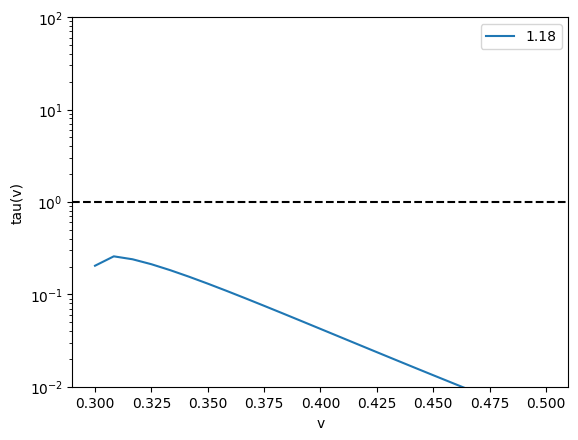

In [74]:
parameters = [#{"T_phot": 5600, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 4900, "photosphere_velocity": 0.3, "t_d": 1.18},
              #{"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              #{"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              #{"T_phot": 3000, "photosphere_velocity": 0.21, "t_d": 3.4},
              #{"T_phot": 2800, "photosphere_velocity": 0.18, "t_d": 4.4},
              ]# TODO: rest
density_table = []

i_arr = [1, 1, 1, 1, 1, 1]

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)
c_arr = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

for i, color, params in zip(i_arr, c_arr, parameters):
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 25)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002), label = params["t_d"], 
            color = color);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    
    
    optic_thick = densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002) > 1
    print( velocities[optic_thick] )
    
    #print( np.trapz(velocities, densities[:,1]/(7.4*params["t_d"]**-1) * (5.0/0.002)) )
    
    #plt.xscale("log")
    plt.ylim(1e-2, 1e2)
    plt.legend()
    
    tau_arr = densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002)
    p0,_ = curve_fit(fit_tau_v, velocities, tau_arr, p0 = [1000, 0.05])
    plt.plot( velocities, fit_tau_v(velocities, *p0), ls='--', linewidth=0.5, color=color)
    print('tau0', p0[0], 've', p0[1])

    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)
plt.ylabel('tau(v)')
plt.xlabel('v')


nheII = np.trapz(4 * np.pi * (velocities*3e10*1.18*24*3600 )**2 * np.sum(densities[:,:], axis=1) * (5.0/0.002), 
         velocities*3e10*1.18*24*3600 
         )

#nheII = np.trapz(4 * np.pi * (velocities*3e10*1.18*24*3600 )**2 * densities[:,-2] * (5.0/0.002), 
#         velocities*3e10*1.18*24*3600 
#         )

In [75]:
nheII * (6.6*1e-24) / (2e33)

0.01467359035634703

In [77]:
np.log10(nheII*600)

57.426173701184176

In [70]:
densities

array([[3.02029491e+03, 5.11439617e-03, 2.36393219e-06, 5.19144486e-04,
        2.10216280e-09, 1.08072050e-04, 6.61956808e-10, 1.71670446e-05,
        1.27368693e-05, 7.27922120e-09, 3.28659934e-10, 2.70830776e+05,
        2.98391379e+05],
       [2.21005988e+03, 6.46410964e-03, 2.17081978e-06, 5.45792026e-04,
        1.52460682e-09, 9.30718537e-05, 3.82343542e-10, 1.35692208e-05,
        1.04027172e-05, 5.95739100e-09, 2.32081426e-10, 2.19467660e+05,
        2.77303216e+05],
       [1.59549143e+03, 6.00639420e-03, 1.74318071e-06, 4.62839887e-04,
        1.09478216e-09, 7.17672579e-05, 2.46127304e-10, 1.01026642e-05,
        7.82903644e-06, 4.48802954e-09, 1.64738954e-10, 1.78043920e+05,
        2.57051939e+05],
       [1.15341124e+03, 5.31096651e-03, 1.37347099e-06, 3.79304938e-04,
        7.87558893e-10, 5.44269363e-05, 1.61943018e-10, 7.47378502e-06,
        5.82431606e-06, 3.34151069e-09, 1.17491185e-10, 1.44611167e+05,
        2.37739103e+05],
       [8.36151878e+02, 4.58102313e-

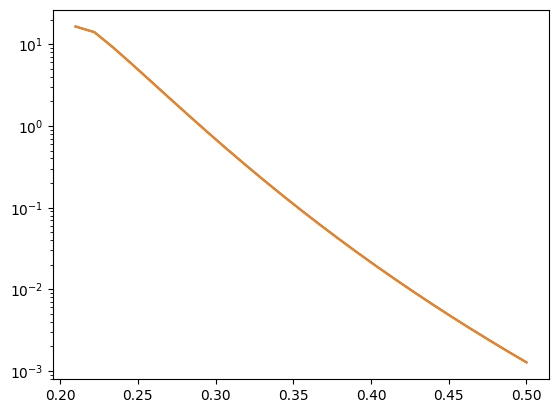

In [38]:
plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002), label = params["t_d"]);
plt.yscale("log")

plt.plot(velocities, 0.23*3.4*1.083*densities[:,1]*0.54 * (0.50/0.002), label = params["t_d"]);

#0.23td λμm nl flu
\


tau0 11366.24400283755 ve 0.032514885994307234


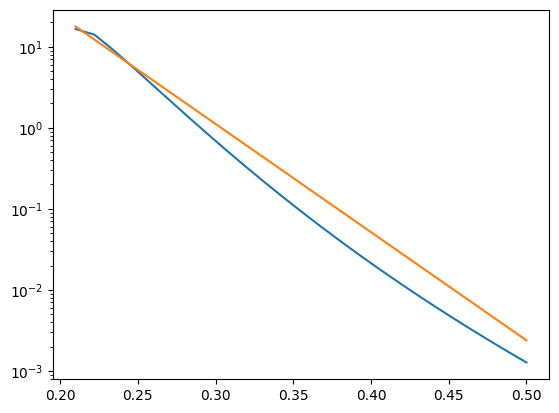

In [26]:
plt.plot(velocities, i * densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002), label = params["t_d"]);

tau_arr = densities[:,1]/(7.4*params["t_d"]**-1) * (0.50/0.002)
v = velocities

def fit_tau_v(v, tau0, ve): 
    return tau0 * np.exp(-v/ve)

from scipy.optimize import curve_fit
p0,_ = curve_fit(fit_tau_v, v, tau_arr)
plt.plot( v, fit_tau_v(v, *p0) )
print('tau0', p0[0], 've', p0[1])
plt.yscale("log")


In [518]:
import pickle
density_table = np.array(density_table)
pickle.dump({"densities":density_table, "parameters" : parameters, "states" : nlte_solver.states}, open("densities.pkl", "wb"))


In [519]:

# demonstrate how to open the pickle file
import pickle
data = pickle.load(open("densities.pkl", "rb"))
data["densities"] # shape: (times, velocities, species)
data["parameters"] # dictionary of parameters  
data["states"] # list of species names
velocities = np.linspace(data["parameters"][0]["photosphere_velocity"], 0.5, 20)

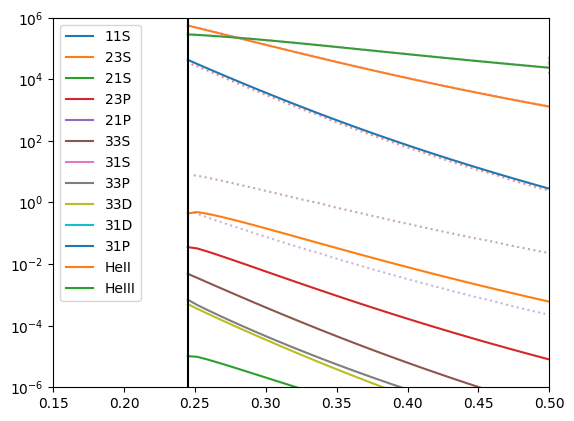

In [520]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

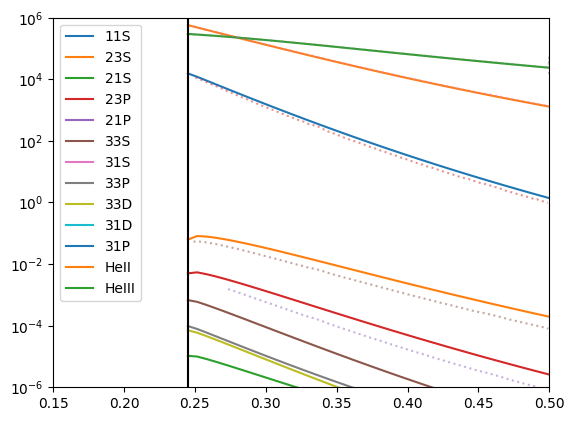

In [521]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    #environment.spectrum = BlackBody(environment.spectrum.temperature, scale=0.*environment.spectrum.scale)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
    #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

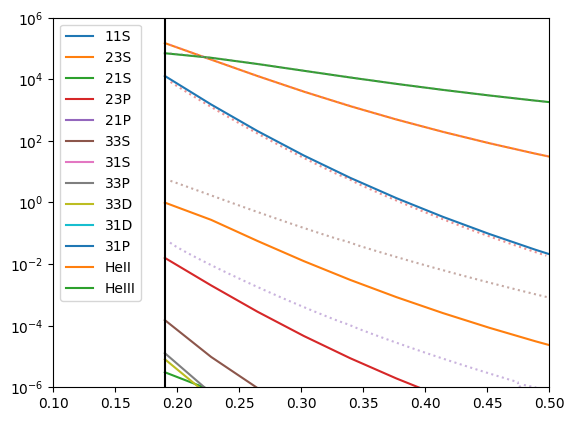

In [522]:
states = NLTE.NLTE_model.States()
velocities = np.linspace(0.19, 0.9, 20)
densities = []
for v in velocities:
    #states = NLTE.NLTE_model.States().filter(["11S", "23S", "21S", "23P", "21P", "33S"])
    environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= v, t_d= 3.41)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment)#, states=states)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    densities.append(nlte_solver.solve(1e7)[1][:, -1])

for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)

tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/late{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.1, 0.5)
plt.axvline(0.19, linestyle="-", color="black")

[<NLTE.NLTE_model.CollisionProcess object at 0x7fc10ec77940>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fc1062b9690>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fc104bd4bb0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fc104bd5600>]


/tmp/ipykernel_146506/225235729.py:20: RuntimeWarning: divide by zero encountered in log10
  widths = np.clip(np.log10(total_fluxes)+7, 0, 10)


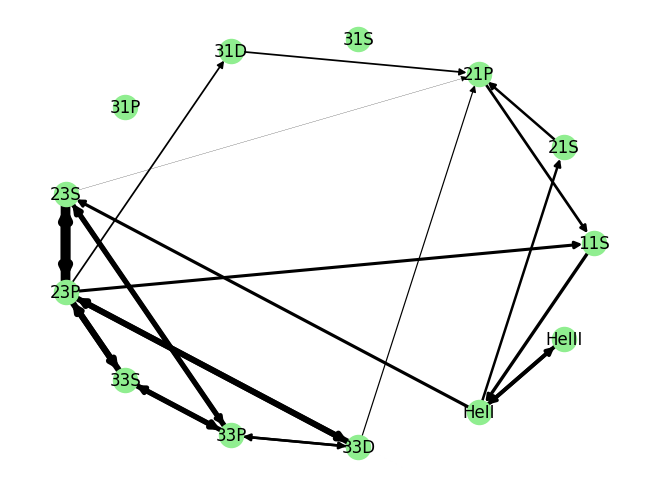

In [523]:
import networkx as nx

# A_{i,j} = rate to state i from state j 
environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= 0.19, t_d= 3.41)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)#, states=states)
nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
#nlte_solver = NLTE.NLTE_model.NLTESolver(environments[1])
#nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]

t, y = nlte_solver.solve(1000000)
print(nlte_solver.processes)
total_fluxes = (nlte_solver.processes[1].get_transition_rate_matrix() * y.T[-1][None,:]).T#[Non,:]

total_fluxes = (nlte_solver.get_transition_rate_matrix() * y.T[-1][None,:]).T#[Non,:]
total_fluxes = total_fluxes / np.max(total_fluxes)
# give nodes the names states.names + ["HeII", "HeIII"]
order= [0,2,4,6,9, 10,1, 3, 5, 7, 8, 11, 12]
#order = np.arange(len(states.names) + 2)

widths = np.clip(np.log10(total_fluxes)+7, 0, 10)
G = nx.DiGraph(widths[order, :][:, order])
labels = {i:name for i, name in enumerate(np.array(states.names + ["HeII", "HeIII"])[order])}
weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.circular_layout(G)
nx.draw(G, pos,
        width=list(weights),
        with_labels=True,
        labels=labels,
        node_color='lightgreen')
#plt.plot(states.names + ["HeII", "HeIII"], -np.diag(rate_matrix))
#plt.yscale("log")
#plt.xlabel("State")
#nx.draw_circular(G, with_labels=True, labels=labels, width=list(widths))

for process Collision the max flux into ortho states is 9.096626368748177e-12, which is from state 21S to state 23S
for process Radiative the max flux into ortho states is 0.0002920089971448108, which is from state 31D to state 23P
for process Photoionization the max flux into ortho states is 0.0, which is from state 11S to state 23S
for process Recombination the max flux into ortho states is 3.3013927674409826, which is from state HeII to state 23S
for process Hot electron ionization the max flux into ortho states is 0.0, which is from state 11S to state 23S


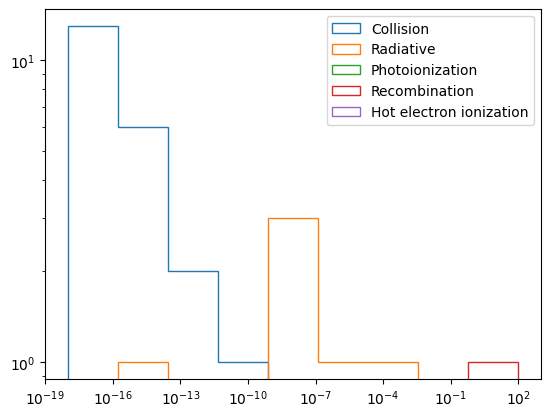

for process Collision the max flux out of ortho states is 1.6649014282358789e-07, which is from state 23S to state 21S
for process Radiative the max flux out of ortho states is 1.5081378587408776, which is from state 23P to state 31D
for process Photoionization the max flux out of ortho states is 0.4038070210741509, which is from state 33S to state HeII
for process Recombination the max flux out of ortho states is 0.0, which is from state 23S to state 11S
for process Hot electron ionization the max flux out of ortho states is 0.0, which is from state 23S to state 11S


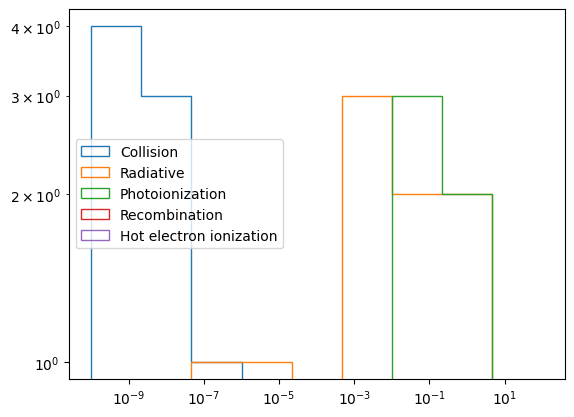

In [492]:
# make histogram of the flux sizes for each process
nlte_solver = NLTE.NLTE_model.NLTESolver(environments[1])
t, y = nlte_solver.solve(1000000)

ortho_states = np.array([name[1] == "3" for name in nlte_solver.states.all_names])
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    in_fluxes = fluxes[ortho_states, :][:, ~ortho_states]
    idx = np.unravel_index(np.argmax(in_fluxes), in_fluxes.shape)
    plt.hist(in_fluxes.flatten(), bins=np.geomspace(1e-18, 100, 10), label=process.name, alpha=1, histtype="step")
    print(f"for process {process.name} the max flux into ortho states is {np.max(in_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[ortho_states][idx[0]]}")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    out_fluxes = fluxes[~ortho_states, :][:, ortho_states]
    idx = np.unravel_index(np.argmax(out_fluxes), out_fluxes.shape)
    plt.hist(out_fluxes.flatten(), bins=np.geomspace(1e-10, 100, 10), label=process.name, alpha=1, histtype="step")
    print(f"for process {process.name} the max flux out of ortho states is {np.max(out_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[0]]}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [513]:
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("11S"), nlte_solver.states.all_names.index("23P")]
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("23P"), nlte_solver.states.all_names.index("33D")]
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("21P"), nlte_solver.states.all_names.index("33P")]

39282000.0

nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("21S"), nlte_solver.states.all_names.index("23P")]

In [514]:
nlte_solver.processes[1].get_A_rates()[nlte_solver.states.all_names.index("11S"), nlte_solver.states.all_names.index("23P")]


176.4